# Crime Analysis

<img src="../reports/figures/CRIME-SCENE-clean-up-business.jpg"/>

In [386]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)
              
crimes = pd.read_csv('../data/processed/crimes_le.csv', index_col=None)

List columns in the dataframe.

In [387]:
crimes.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID,date_diff_reported,day_id
0,-79.176010,43.802116,18291,GO-20143335879,2014-11-08,2014-11-20,2,1430,100,5,2014,November,20,324,Thursday,13,2014.0,9,8.0,312.0,Saturday,19,0,D42,131,105,43.802116,-79.176010,10001,12 days 00:00:00.000000000,5
1,-79.452866,43.733387,18292,GO-20143349747,2014-11-08,2014-11-22,1,1480,100,7,2014,November,22,326,Saturday,18,2014.0,9,8.0,312.0,Saturday,16,0,D32,33,25,43.733387,-79.452866,10002,14 days 00:00:00.000000000,5
2,-79.403679,43.654961,18294,GO-20143367860,2014-11-08,2014-11-25,4,1430,100,5,2014,November,25,329,Tuesday,15,2014.0,9,8.0,312.0,Saturday,12,0,D14,78,62,43.654961,-79.403679,10003,17 days 00:00:00.000000000,5
3,-79.367813,43.644344,18295,GO-20143307637,2014-11-08,2014-11-15,1,1430,100,5,2014,November,15,319,Saturday,18,2014.0,9,8.0,312.0,Saturday,23,0,D51,77,122,43.644344,-79.367813,10004,7 days 00:00:00.000000000,5
4,-79.358871,43.676205,18296,GO-20143309539,2014-11-16,2014-11-16,4,1410,100,2,2014,November,16,320,Sunday,0,2014.0,9,16.0,320.0,Sunday,0,0,D55,67,97,43.676205,-79.358871,10005,0 days 00:00:00.000000000,6


In [388]:
list(crimes)

['X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'MCI',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Lat',
 'Long',
 'FID',
 'date_diff_reported',
 'day_id']

## Train Test Split

In [389]:
from sklearn.model_selection import train_test_split

Define `x` and `y`.

In [390]:
# define X and y
feature_cols = ['premisetype', 'occurrenceyear', 'occurrencemonth', 
                'day_id', 'occurrencedayofyear', 'occurrencehour', 
                'Hood_ID', 'Neighbourhood', 'Lat', 'Long']
X = crimes[feature_cols]
y = crimes.MCI

In [392]:
from imblearn.over_sampling import SMOTE
    
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X,y)

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

## Models

### Decision Tree Classifier

Decision tree classification model forms a tree structure from dataset. Decision tree is
built by dividing a dataset into smaller pieces. At each step in the algorithm, a decision tree
node is splitted into two or more branches until it reaches leaf nodes. Leaf nodes indicates the
class labels or result. At each step, decision tree chooses a feature that best splits the data
with the help of two functions: Gini Impurity and Information Gain.
Gini Impurity measures the probability of classifying a random sample incorrectly if the label
is picked randomly according to the distribution in a branch.

<img src="../reports/figures/information_gain.png"/>

Gini Impurity is computed by summing the probability p times the probability of i
mistaking while categorizing an item (1 − p ) .

While building the tree, Information Gain helps to decide which feature to split next at each step. Information Gain can be calculated using entropy, which is a function to calculate expected value at each step. Entropy is defined as :

<img src="../reports/figures/entropy.png"/>

*pi* represents the percentage of each feature being present in the child node after a i
split. Sum of p is always 1. Information Gain can be calculated using the following equation

*IG = Entropy(parent) − Weighted Sum of Entropy(children) … (iii)*

At each step, decision tree try to make splits that give the purest child nodes.


In [422]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='entropy', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=300,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

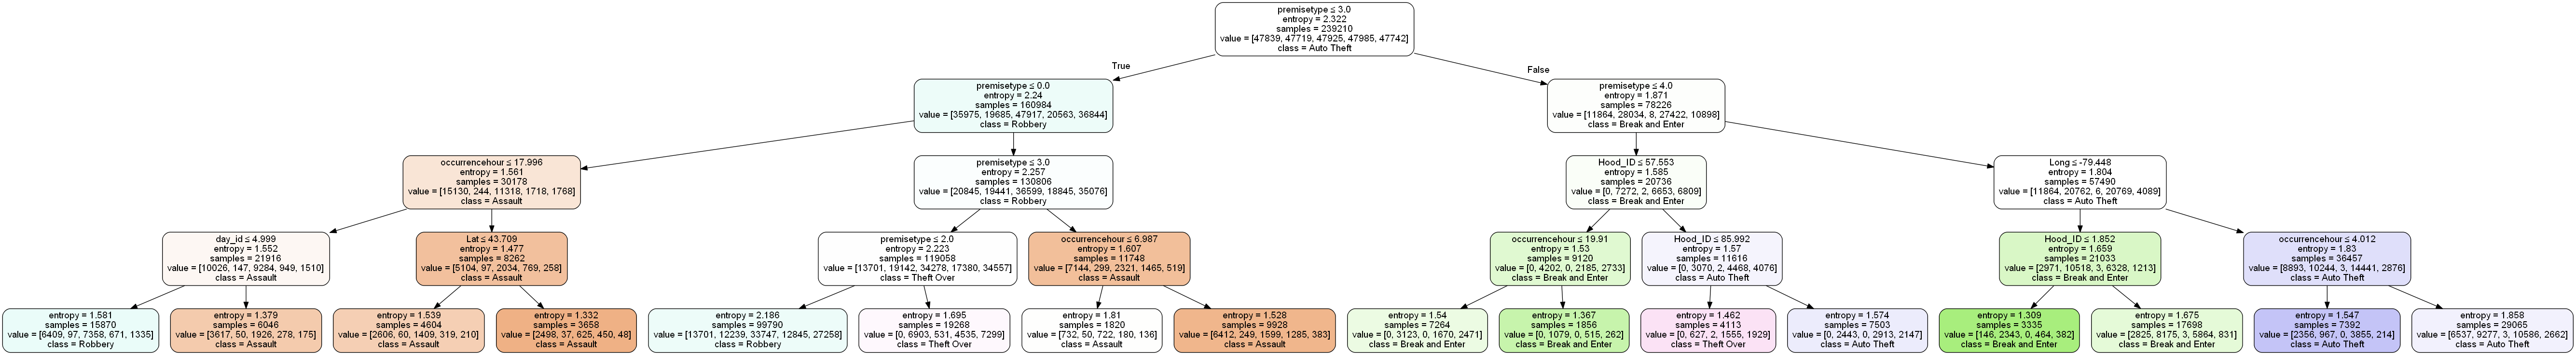

In [423]:
# create a Graphviz file
from sklearn.tree import export_graphviz
from IPython.display import Image
# import StringIO, pydot
%matplotlib inline
import pylab, pydotplus
from sklearn.externals.six import StringIO  

dot_data = StringIO() 
export_graphviz(treeclf, 
                out_file=dot_data, 
                feature_names=feature_cols, 
                class_names=['Assault', 'Break and Enter', 
                             'Robbery', 'Auto Theft', 'Theft Over'],
                filled=True, 
                rounded=True,  
                leaves_parallel=False,
                rotate=False,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

#### Feature Importance

In [424]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
0,premisetype,0.929600
5,occurrencehour,0.025912
9,Long,0.018777
6,Hood_ID,0.018168
3,day_id,0.005299
8,Lat,0.002244
1,occurrenceyear,0.000000
2,occurrencemonth,0.000000
4,occurrencedayofyear,0.000000
7,Neighbourhood,0.000000


In [425]:
y_pred = treeclf.predict(X_test)
print(y_pred)

[2 2 2 ... 2 3 0]


#### Mean Square Error

In [426]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

2.373238838906807

Accuracy

In [482]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='gini', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)

In [483]:
metrics.accuracy_score(y_test, y_pred)

0.4549312510609404

Log-Loss

In [484]:
pred = treeclf.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

1.208716151990663

### Gaussian Naive Bayes

Gaussian Naive Bayes is a supervised classifier that uses naive assumption that there
is no dependency between two features. This classifier is implemented by applying Bayesian
Theorem. According to the theorem, class y and a dependent feature vector consisting of
x0, x1, ..., xn , has the following relationship:
<img src="../reports/figures/gaussian_naives_bayes.PNG"/>


This probability model, along with a decision rule construct Naive Bayes Classifier. There are different types of Naive Bayes classification algorithms based on data distribution.

In [447]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [489]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=3), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [490]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
31.39%



In [491]:
pred = std_clf.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

1.506332281358407

In [457]:
# Extract PCA from pipeline
pca_std = std_clf.named_steps['pca']

In [458]:
# Show first principal components
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 with scaling:
 [-0.05850135 -0.0083414  -0.01815364 -0.02198681 -0.01445538 -0.01343381
  0.63864553 -0.10855677  0.36092355  0.6673733 ]


### Logistic Regression

*Logistic regression* uses linear boundaries to classify data into different categories.
Logistic regression can work on both binary and multiclass problems. For multiclass dataset,
one vs the rest scheme is used. In this method, logistic regression trains separate binary
classifiers for each class. Meaning, each class is classified against all other classes, by
assuming that all other classes is one category.

In [492]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight=None)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [493]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

#### Model Evaluation

In [494]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [495]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.16      0.08      0.11     47839
          1       0.39      0.52      0.45     47719
          2       0.33      0.57      0.42     47925
          3       0.34      0.33      0.34     47985
          4       0.28      0.14      0.18     47742

avg / total       0.30      0.33      0.30    239210



In [496]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.17      0.09      0.11     23567
          1       0.40      0.52      0.45     23687
          2       0.33      0.57      0.42     23481
          3       0.34      0.33      0.33     23421
          4       0.28      0.14      0.19     23664

avg / total       0.30      0.33      0.30    117820



### K-Nearest Neighbor

Nearest Neighbors method is used in both supervised and unsupervised learning.
While testing with new data, KNN looks at *k* data points in training dataset which are closest
to the test data point. *k* indicates the number of neighbors voting to classify a datapoint. The
distance can be measured with various metrics. Euclidean distance is the most common
choice.


In [529]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=300, p=2,
           weights='uniform')

In [530]:
y_pred = knn.predict(X_test)

In [531]:
metrics.accuracy_score(y_test, y_pred)

0.3424036666100832

In [532]:
pred = knn.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

1.4897760316871804

### Ensemble Methods

Ensemble learning is a method of combining multiple learning algorithm together to achieve better performance over a single algorithm. Ensemble methods can be divided into two categories: averaging methods and boosting methods.
    
**Averaging** method independently develops different models and averages their
predictions. In the combined model the variance gets reduced, and therefore, it gives better result. 

**Boosting** method is built by using separate base models sequentially. The goal of boosting is to reduce biases of the combined model and to build a powerful model from several weak models.

#### Random Forest

In this ensemble model several decision trees are built using samples drawn with replacement from the training set. The splitting of each node of a tree is not based on the best split of all features, rather the best split among a random set of features. The bias of the tree increases due to randomness, but averaging also helps to decrease variance, hence this model
often achieves better result.


In [372]:
from sklearn.ensemble import RandomForestClassifier

In [510]:
rfc = RandomForestClassifier(criterion='gini',
                             min_samples_split=500,
                            n_estimators=10,
                            n_jobs=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [511]:
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.5733152266168732

In [512]:
pred = rfc.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

1.0501661257670867

#### Adaboost

**Adaboost or Adaptive Boosting** is a boosting algorithm. Adaboost combines several weak learners to produce a stronger model. The final output is obtained from the weighted sum of the weak models. As it is a sequential process, in each step a weak learner is changed in favor of misclassified data points in previous classifiers.

In [375]:
from sklearn.ensemble import AdaBoostClassifier

In [376]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=500, 
                         learning_rate=0.1, 
                         random_state=0)

In [377]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 0.493/0.495


### Performance Metrics

#### Accuracy

Accuracy measures how many predictions are matched exactly with the actual or true
label of the testing dataset and returns the percentage of correct results. Accuracy can be
calculated using the following equation:

<img src="../reports/figures/accuracy.PNG" width="400"/>


#### Log-Loss

Log loss is used to measure performance of classifiers by penalizing false
classifications. Therefore, smaller value of log loss means the classifier is more accurate. The
log loss value of a perfect classifier is 0. The classifier assigns a probability of predicting
each class rather than picking the most probable class. With this probabilities, log loss is
measured by the following equation:

<img src="../reports/figures/log-loss.PNG" width="350"/>


#### Confusion Matrix

Confusion matrix returns a table layout that helps to visualize the performance of an
algorithm rather than producing a numerical value that indicates the goodness of the
algorithm.

Confusion matrix is an X × Y matrix where X dimension indicates the true classes
and Y dimension indicates the predicted classes. The value of X and Y is equal, and they
indicate the number of classes in a dataset.